## Using Tutorial Notebook on Subic Data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [3]:
print(pyart.__version__)

0.0.0


In [4]:
# radar = pyart.io.read('subic_p/01/09/20190109052006.uf')
radar = pyart.io.read('test_data/sgpwsacrcwrhiC1.a1.20120820.204016.nc')

In [14]:
help(radar)

Help on Radar in module pyart.core.radar object:

class Radar(builtins.object)
 |  Radar(time, _range, fields, metadata, scan_type, latitude, longitude, altitude, sweep_number, sweep_mode, fixed_angle, sweep_start_ray_index, sweep_end_ray_index, azimuth, elevation, altitude_agl=None, target_scan_rate=None, rays_are_indexed=None, ray_angle_res=None, scan_rate=None, antenna_transition=None, instrument_parameters=None, radar_calibration=None, rotation=None, tilt=None, roll=None, drift=None, heading=None, pitch=None, georefs_applied=None)
 |  
 |  A class for storing antenna coordinate radar data.
 |  
 |  The structure of the Radar class is based on the CF/Radial Data file
 |  format. Global attributes and variables (section 4.1 and 4.3) are
 |  represented as a dictionary in the metadata attribute. Other required and
 |  optional variables are represented as dictionaries in a attribute with the
 |  same name as the variable in the CF/Radial standard. When a optional
 |  attribute not pre

In [5]:
radar.info('full')

altitude:
	data: [318.]
	long_name: Altitude
	units: m
	standard_name: altitude
altitude_agl:
	data: [4.318]
	long_name: Altitude above ground level
	units: m
	standard_name: altitude_above_ground_level
antenna_transition:
	data: [0 0 0 ... 0 0 0]
	long_name: Antenna transition indicator, 1 if between sweeps, otherwise 0
	units: unitless
	standard_name: antenna_is_in_transition_between_sweeps
azimuth:
	data: [359.5903 359.5903 359.5903 ... 359.5958 359.5958 359.5958]
	long_name: Azimuth angle from true north
	units: degree
	standard_name: beam_azimuth_angle
	axis: radial_azimuth_coordinate
elevation:
	data: [75.720825 75.356026 75.03002  ...  4.968984  4.968984  4.968984]
	long_name: Elevation angle from horizontal
	units: degree
	standard_name: beam_elevation_angle
	axis: radial_elevation_coordinate
fields:
reflectivity:
		data: [[-50.19982  -46.883778 -53.373833 ... -17.319336 -23.24128  -20.26693 ]
 [-51.38133  -45.973976 -45.047707 ... -18.838417 -17.348152 -21.829235]
 [-44.004112

In [8]:
print(f"Radar Scan Type is: {radar.scan_type}")

Radar Scan Type is: other


Since "other" scan type is not reconized by pyart (cf: https://github.com/ARM-DOE/pyart/blob/main/pyart/graph/radardisplay.py, line#114 onward)
we'll do a hack on the scan type next..

In [9]:
radar.scan_type = "rhi"

In [10]:
display = pyart.graph.RadarDisplay(radar)

/Users/rolanvc/opt/anaconda3/envs/phdexp/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


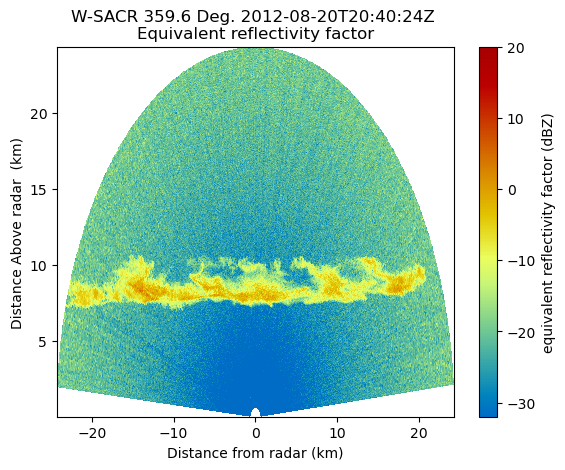

In [11]:
display.plot('reflectivity', sweep=1, vmin=-32, vmax=20)

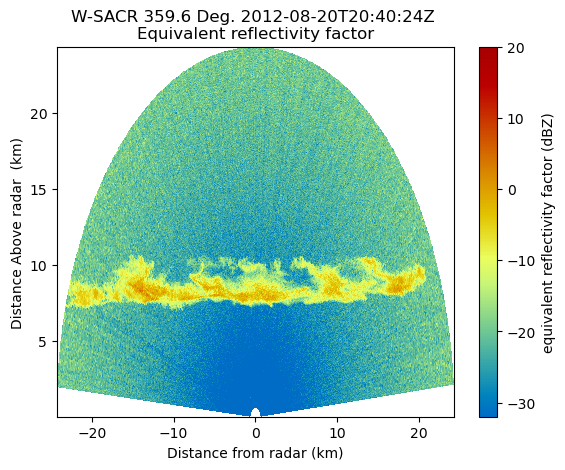

In [12]:
display.plot('reflectivity', sweep=1, vmin=-32, vmax=20)

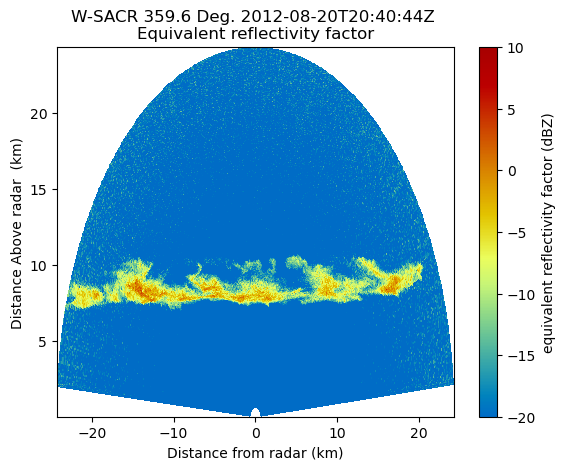

In [13]:
display.plot('reflectivity', sweep=2, vmin=-20, vmax=10)